## Note: Work Delegation/Individual Grade Portion\n
  This notebook contains code that our team contributed to together. Much of my work is also located in Saketh's individual notebook, we worked on the visualizations and the hypothesis testing for genre. I also assisted the team when we all worked on code together on Zoom, much of that should be in Zach's notebook.

I also spent a lot of time on the presentation. 

# Joshua Johnson's Individual Notebook 


In [1]:
#Import Libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
movie_gross = pd.read_csv('../../data/zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
movie_gross.isna().sum()



title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

# Data Cleaning

In [5]:
#movie_gross['foreign_gross']= movie_gross['foreign_gross'].str.replace(',','')
#movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'])
#movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'])
#movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(movie_gross['domestic_gross'].median())
#movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median())
#movie_gross = movie_gross.dropna()

# Pulling Necessary Data

In [6]:
info = movie_gross[['title','domestic_gross','foreign_gross']]
info.head()

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000


# Data Visualizations

# Movie_info Dataset

In [7]:
movie_info = pd.read_csv('../../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [8]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


# Checking for Null Values

In [9]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [10]:
#movie_info = movie_info.drop(['box_office', 'dvd_date', 'theater_date', 'studio'], axis=1)
#movie_info['writer'] = movie_info['writer'].fillna('Unknown')
#movie_info['director'] = movie_info['director'].fillna('Unknown')
#movie_info['synopsis'] = movie_info['synopsis'].fillna('Unknown')
#movie_info = movie_info.dropna()

# Pulling necessary information

In [11]:
genre = movie_info.loc[(movie_info['genre'].str.contains('Drama')) & (movie_info['director'].count() > 14) , ['genre', 'rating', 'director', 'writer']]
genre

,genre,rating,director,writer
0,Action and Adventure|Classics|Drama,R,William Friedkin,Ernest Tidyman
1,Drama|Science Fiction and Fantasy,R,David Cronenberg,David Cronenberg|Don DeLillo
2,Drama|Musical and Performing Arts,R,Allison Anders,Allison Anders
3,Drama|Mystery and Suspense,R,Barry Levinson,Paul Attanasio|Michael Crichton
4,Drama|Romance,NR,Rodney Bennett,Giles Cooper
...,...,...,...,...
1551,Action and Adventure|Drama,R,Rick Rubin,Rick Rubin|Ric Menello
1552,Comedy|Drama,R,Joel Coen,Joel Coen|Ethan Coen
1557,Classics|Comedy|Drama|Musical and Performing Arts,G,Gordon Douglas,NaN
1558,Comedy|Drama|Kids and Family|Sports and Fitness,PG,David Mickey Evans,David Mickey Evans|Robert Gunter


In [12]:
directors = movie_info.groupby(['director']).size()
directors.sort_values(ascending=False)

director
Steven Spielberg    10
Clint Eastwood       8
Barry Levinson       4
Curtis Hanson        4
William Beaudine     4
                    ..
Mike Binder          1
Mike Barker          1
Miguel Arteta        1
Mickey Keating       1
Justin Lin           1
Length: 1125, dtype: int64

In [13]:
genres = movie_info.groupby(['genre']).size()
genres.sort_values(ascending=False)

genre
Drama                                                                                                                       151
Comedy                                                                                                                      110
Comedy|Drama                                                                                                                 80
Drama|Mystery and Suspense                                                                                                   67
Art House and International|Drama                                                                                            62
Action and Adventure|Drama                                                                                                   42
Action and Adventure|Drama|Mystery and Suspense                                                                              40
Drama|Romance                                                                                     

# Data Visualizations

<AxesSubplot:>

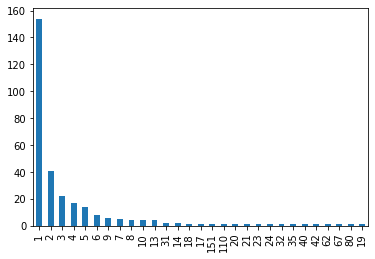

In [14]:
genres.value_counts().plot(kind='bar')

# TMBD Movie Data

In [15]:
tmbd_movie = pd.read_csv('../../data/zippedData/tmdb.movies.csv.gz')
tmbd_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
tmbd_movie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [17]:
tmbd_movie.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

# Pulling necessary data


In [18]:
score = tmbd_movie[['title','popularity','vote_count', 'vote_average']]
score.head()

,title,popularity,vote_count,vote_average
0,Harry Potter and the Deathly Hallows: Part 1,33.533,10788,7.7
1,How to Train Your Dragon,28.734,7610,7.7
2,Iron Man 2,28.515,12368,6.8
3,Toy Story,28.005,10174,7.9
4,Inception,27.920,22186,8.3


# Movie Budget Data

In [19]:
movie_budget = pd.read_csv('../../data/zippedData/tn.movie_budgets.csv.gz')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [21]:
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

# Pulling Necessary Data

In [22]:
budget = movie_budget[['movie','production_budget','domestic_gross', 'worldwide_gross']]
budget.head()


,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# IMDB Movie Data

In [23]:
import sqlite3 
import pandas as pd
conn = sqlite3.connect('../../data/zippedData/im.db')

In [24]:
print(conn)

# Pulling Necessary Data

In [25]:
imbd = pd.read_sql("""
SELECT DISTINCT mb.primary_title, mb.genres,  p.primary_name as director
FROM movie_basics as mb,
directors as d on d.movie_id = mb.movie_id,
persons as p on d.person_id = p.person_id
; """, conn)
imbd

,primary_title,genres,director
0,Sunghursh,"Action,Crime,Drama",Harnam Singh Rawail
1,One Day Before the Rainy Season,"Biography,Drama",Mani Kaul
2,The Other Side of the Wind,Drama,Orson Welles
3,Sabse Bada Sukh,"Comedy,Drama",Hrishikesh Mukherjee
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",Raoul Ruiz
...,...,...,...
163103,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary,Ana Célia de Oliveira
163104,Dankyavar Danka,Comedy,Kanchan Nayak
163105,6 Gunn,None,Kiran Gawade
163106,Chico Albuquerque - Revelações,Documentary,Vinicius Augusto Bozzo


# Testing out Joins
-This cell joins the movie_budget table with the SQL data pulled from above

In [26]:
joins = movie_budget.set_index('movie').join(imbd.set_index('primary_title'), how='inner')
joins.reset_index(inplace=True)
joins.groupby('id').first()
joins

,index,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
0,#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,"Crime,Drama,Horror",Tara Subkoff
1,10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422","Drama,Horror,Mystery",Dan Trachtenberg
2,10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
3,12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648","Action,Drama,Romance",Gabriel Soriano
4,12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378","Action,Drama,History",Nicolai Fuglsig
...,...,...,...,...,...,...,...,...
4162,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Byron Howard
4163,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Rich Moore
4164,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Jared Bush
4165,Zulu,82,"Dec 31, 2013","$16,000,000",$0,"$1,844,228","Crime,Drama,Thriller",Jérôme Salle


# Choosing the first Director

In [27]:
joins = joins.groupby('index').nth(0)
joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
index,,,,,,,
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,"Crime,Drama,Horror",Tara Subkoff
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422","Drama,Horror,Mystery",Dan Trachtenberg
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648","Action,Drama,Romance",Gabriel Soriano
12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378","Action,Drama,History",Nicolai Fuglsig
...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693",Comedy,Ben Stiller
Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188","Animation,Comedy,Drama",Pedro Morelli
Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Byron Howard


# Chooses only the first genre

In [28]:
joins['genres'] = joins['genres'].str.split(",")
joins['genres'] = joins['genres'].fillna('Unknown')
for x in range(joins['genres'].count()):
    if joins['genres'][x] == 'Unknown':
        joins['genres'][x] = 'Unknown'
    else:
        joins['genres'][x] = joins['genres'][x][0]
        x +=1
joins

<ipython-input-28-608fd6d50ce4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joins['genres'][x] = joins['genres'][x][0]
<ipython-input-28-608fd6d50ce4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joins['genres'][x] = 'Unknown'


,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
index,,,,,,,
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,Crime,Tara Subkoff
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",Drama,Dan Trachtenberg
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648",Action,Gabriel Soriano
12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378",Action,Nicolai Fuglsig
...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693",Comedy,Ben Stiller
Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188",Animation,Pedro Morelli
Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616",Adventure,Byron Howard


In [29]:
joins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2298 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2298 non-null   int64 
 1   release_date       2298 non-null   object
 2   production_budget  2298 non-null   object
 3   domestic_gross     2298 non-null   object
 4   worldwide_gross    2298 non-null   object
 5   genres             2298 non-null   object
 6   director           2298 non-null   object
dtypes: int64(1), object(6)
memory usage: 223.6+ KB


In [30]:
joins['domestic_gross']= joins['domestic_gross'].str.replace(',','')
joins['domestic_gross']= joins['domestic_gross'].str.replace('$','')
joins['domestic_gross'] = pd.to_numeric(joins['domestic_gross'])
joins['worldwide_gross']= joins['worldwide_gross'].str.replace(',','')
joins['worldwide_gross']= joins['worldwide_gross'].str.replace('$','')
joins['worldwide_gross'] = pd.to_numeric(joins['worldwide_gross'])
joins['production_budget']= joins['production_budget'].str.replace(',','')
joins['production_budget']= joins['production_budget'].str.replace('$','')
joins['production_budget'] = pd.to_numeric(joins['production_budget'])

In [31]:
joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
index,,,,,,,
#Horror,16,"Nov 20, 2015",1500000,0,0,Crime,Tara Subkoff
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422,Drama,Dan Trachtenberg
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616,Drama,Timothy Hines
12 Rounds,37,"Mar 27, 2009",20000000,12234694,17306648,Action,Gabriel Soriano
12 Strong,64,"Jan 19, 2018",35000000,45819713,71118378,Action,Nicolai Fuglsig
...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016",50000000,28848693,55348693,Comedy,Ben Stiller
Zoom,26,"Aug 11, 2006",35000000,11989328,12506188,Animation,Pedro Morelli
Zootopia,57,"Mar 4, 2016",150000000,341268248,1019429616,Adventure,Byron Howard


In [32]:
joins["profit"] = joins["worldwide_gross"] - joins["domestic_gross"]

In [33]:
joins = joins.sort_values('profit', ascending=False)
joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,Horror,Atsushi Wada,2015837654
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,Pete Meads,1548844451
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,Action,Anthony Russo,1369318718
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Action,James Wan,1165715774
The Fate of the Furious,23,"Apr 14, 2017",250000000,225764765,1234846267,Action,F. Gary Gray,1009081502
...,...,...,...,...,...,...,...,...
Open Secret,97,"Mar 25, 2015",100000,0,0,Documentary,Steve Lickteig,0
Ordinary People,18,"Sep 19, 1980",6000000,52302978,52302978,Drama,Eduardo W. Roy Jr.,0
Original Sin,44,"Aug 3, 2001",26000000,16521410,16521410,Comedy,Jean Lee,0


# Tests the count of the different genres

In [34]:
joins['genres'].value_counts()

Action         539
Drama          494
Comedy         415
Adventure      200
Biography      149
Horror         137
Documentary    129
Crime          120
Thriller        31
Animation       21
Unknown         12
Sci-Fi           9
Fantasy          8
Family           7
Mystery          7
Romance          5
Musical          4
Music            4
War              3
Sport            2
Western          2
Name: genres, dtype: int64

In [35]:
#Find the median fross of the genres


# Test the count of different directors

In [36]:
joins['director'].value_counts()

Steven Spielberg      8
Ridley Scott          6
Clint Eastwood        6
Jon M. Chu            6
David Gordon Green    6
                     ..
Dan Perri             1
Eric Dean Hordes      1
Nisha Ganatra         1
Michael Worth         1
Adrian Noble          1
Name: director, Length: 1783, dtype: int64

# Find Average Gross of Each Genre

In [37]:
#Find the average gross of the genres
#joins_mean = joins["domestic_gross"].mean()
mean = joins['genres'].value_counts().mean()
mean

109.42857142857143

# DATA ANALYSIS

In [38]:
joins.sort_values(by="worldwide_gross" , ascending = False).head(100)

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,Horror,Atsushi Wada,2015837654
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,Pete Meads,1548844451
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,Action,Anthony Russo,1369318718
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,Action,Colin Trevorrow,996584239
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Action,James Wan,1165715774
The Avengers,27,"May 4, 2012",225000000,623279547,1517935897,Action,Joss Whedon,894656350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963,Action,Joss Whedon,944008095
Black Panther,42,"Feb 16, 2018",200000000,700059566,1348258224,Action,Ryan Coogler,648198658
Jurassic World: Fallen Kingdom,13,"Jun 22, 2018",170000000,417719760,1305772799,Action,J.A. Bayona,888053039


Text(0.5, 0, 'Genres')

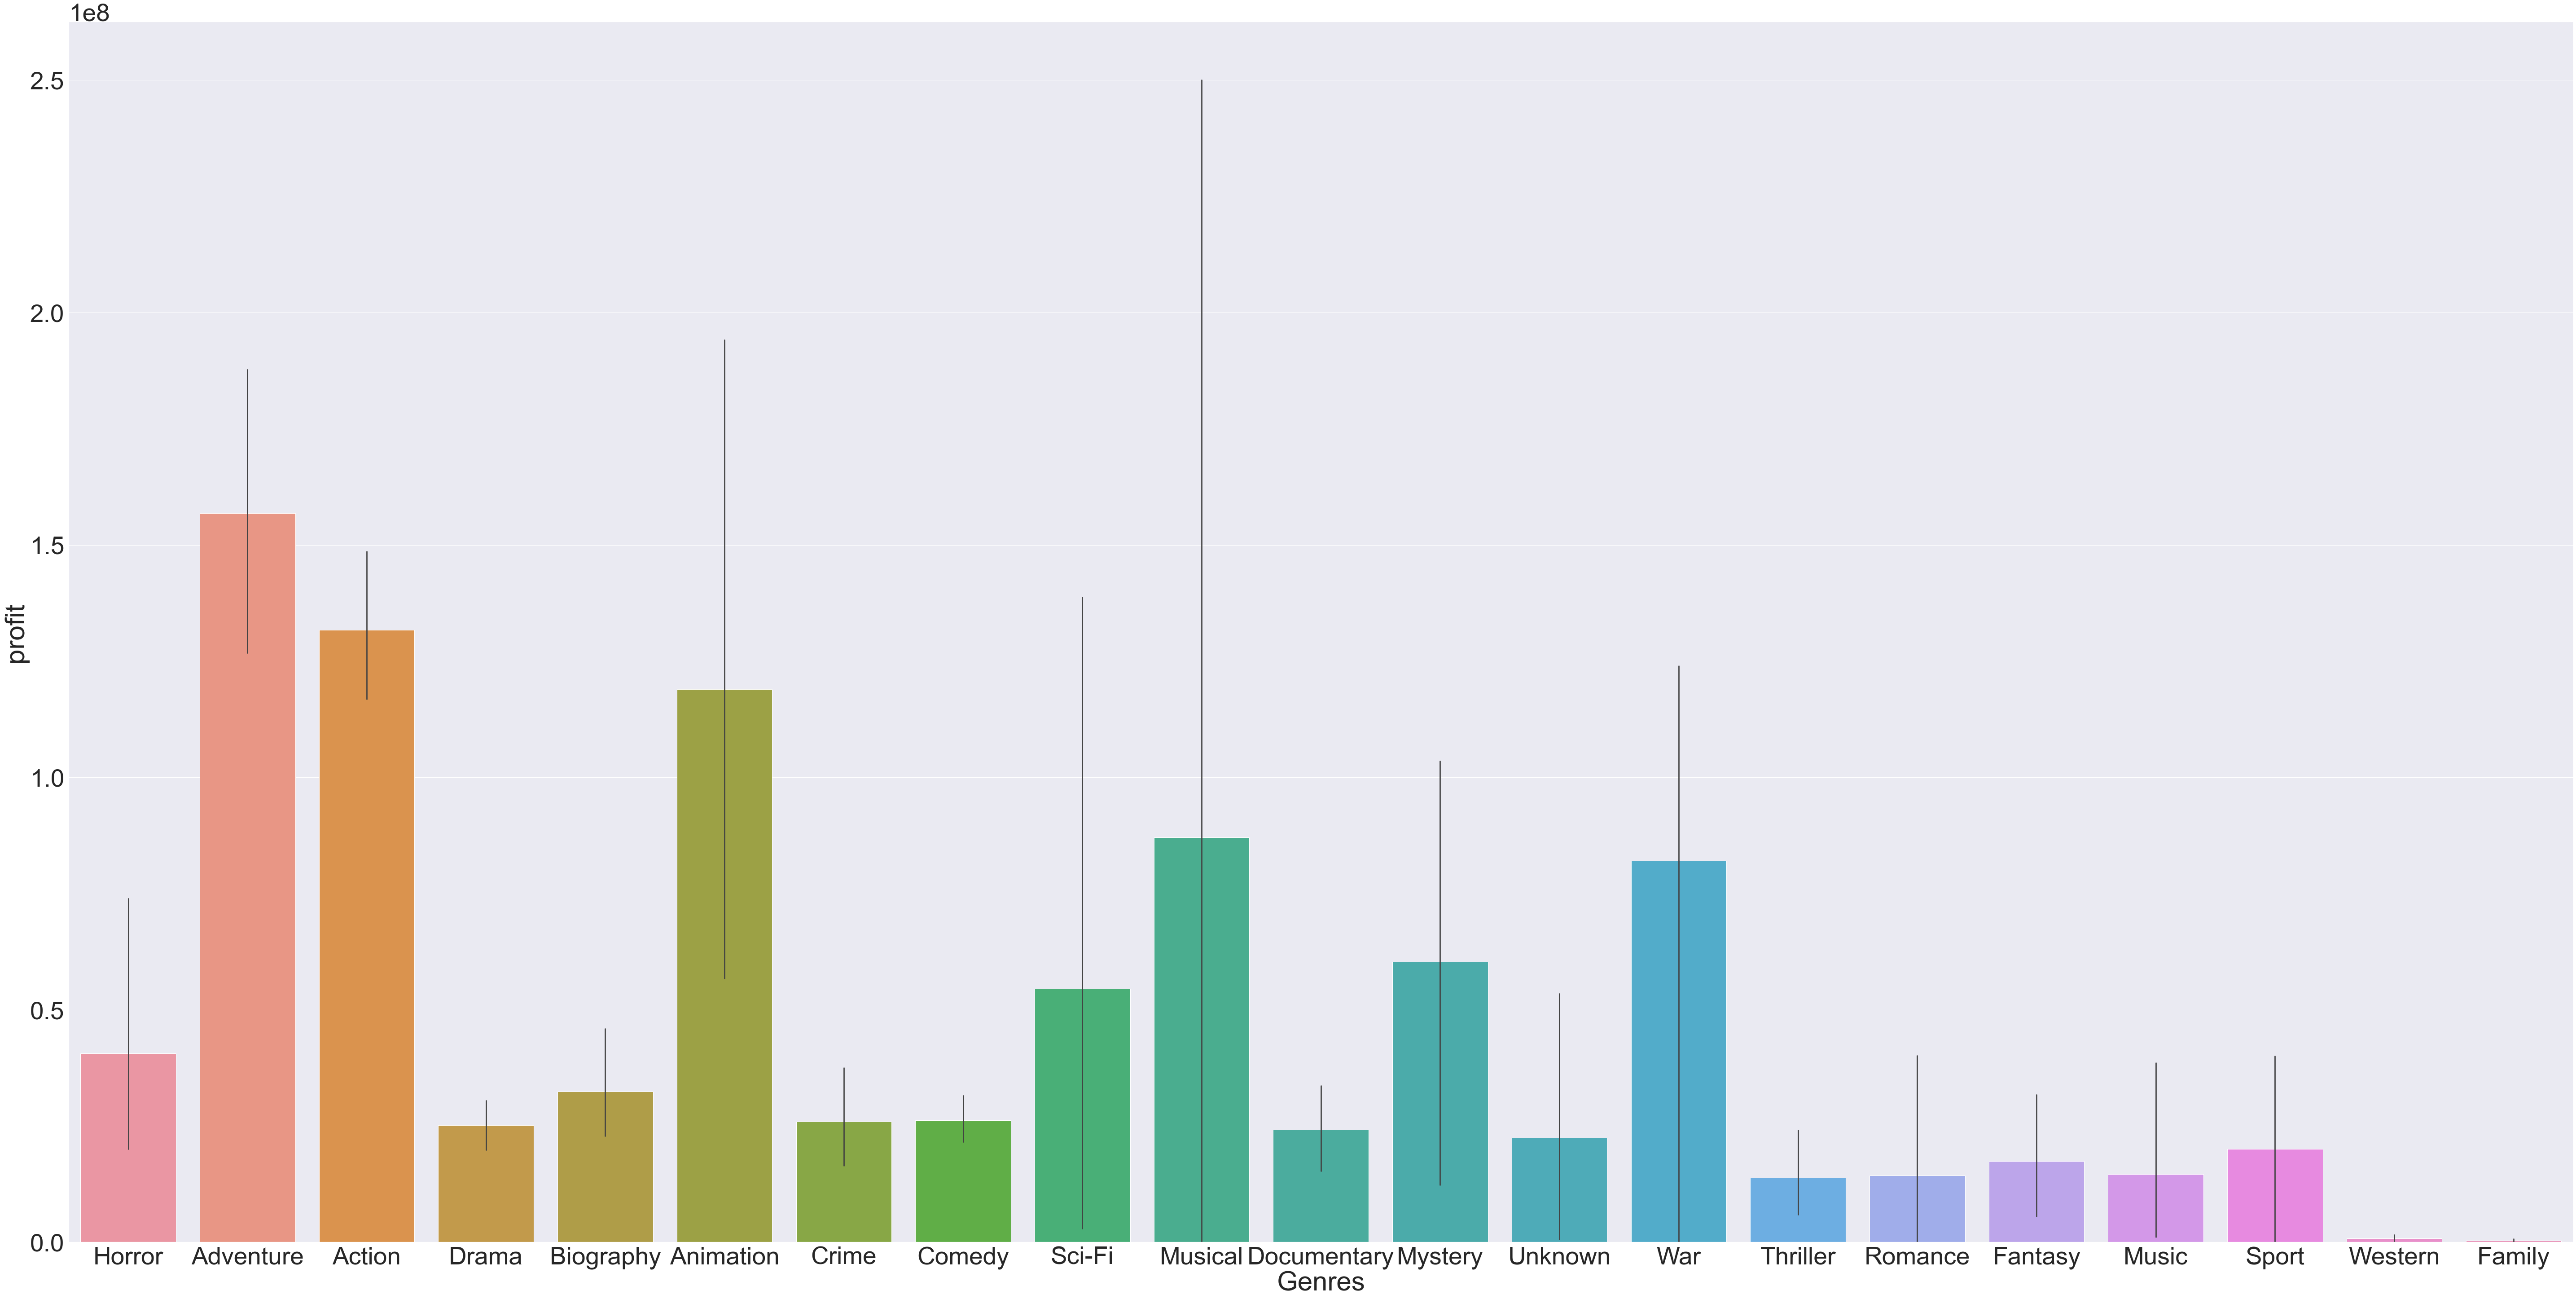

In [39]:
#joins.sort_values('profit')
plt.figure(figsize=(100,50))
sns.set_theme(font_scale=5)
sns.barplot(x=joins['genres'], y=joins['profit'], data= joins)
plt.xlabel("Genres")